<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_MineriaDeDatosConR/blob/main/MDD_Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MDD - Tarea: Análisis descriptivo y gráfico catálogo de películas de Netflix


En primer lugar, calcula la frecuencia y frecuencia relativa de las categorías del campo “Type”. ¿Qué porcentaje del catálogo de películas son “Movie” y qué porcentaje son “TV Show”? Complementa con un gráfico adecuado

Selecciona solo las películas del catálogo de Netflix. Reporta las estadísticas descriptivas básicas (media, mediana, desviación estándar, mínimo y máximo) sobre la duración de las películas en minutos. Comenta los resultados. Hint: funciones útiles son – gregexpr() ; strsplit() ; str_locate()- de la librería “stringr”

Construye un histograma a partir de la duración en minutos de las películas del catálogo de Netflix. Comenta tus resultados relacionando también con el punto anterior.

In [1]:
# Instalación de librerías

install.packages("readr")
install.packages("readxl")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("lubridate")
install.packages("devtools")
devtools::install_github("tidyverse/dplyr")
install.packages("moments")


# Carga de librerías


library(readxl)
library(moments)
library(readr)
library(dplyr)
library(lubridate)
library(ggplot2)
library(magrittr)
library(stringr)

# comprobamos que la ruta existe file.exists("/Users/carolinaherreraazolas/Downloads/netflix_titles.csv")

# Carga de documento
datos <- read.csv("netflix_titles.csv")
summary(datos)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpHMkM9V/remotes117e682dc747/tidyverse-dplyr-1d17672/DESCRIPTION’ ... OK
* preparing ‘dplyr’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* installing the package to process help pages
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘dplyr/inst’
* building ‘dplyr_1.1.4.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




   show_id              type              title             director        
 Length:8807        Length:8807        Length:8807        Length:8807       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     cast             country           date_added         release_year 
 Length:8807        Length:8807        Length:8807        Min.   :1925  
 Class :character   Class :character   Class :character   1st Qu.:2013  
 Mode  :character   Mode  :character   Mode  :character   Median :2017  
                                                          Mean   :2014  
                                                          3rd Qu.:2019  
                       


  Movie TV Show 
   6131    2676 

   Movie  TV Show 
69.61508 30.38492 

  Movie TV Show 
   6131    2676 

   Movie  TV Show 
69.61508 30.38492 


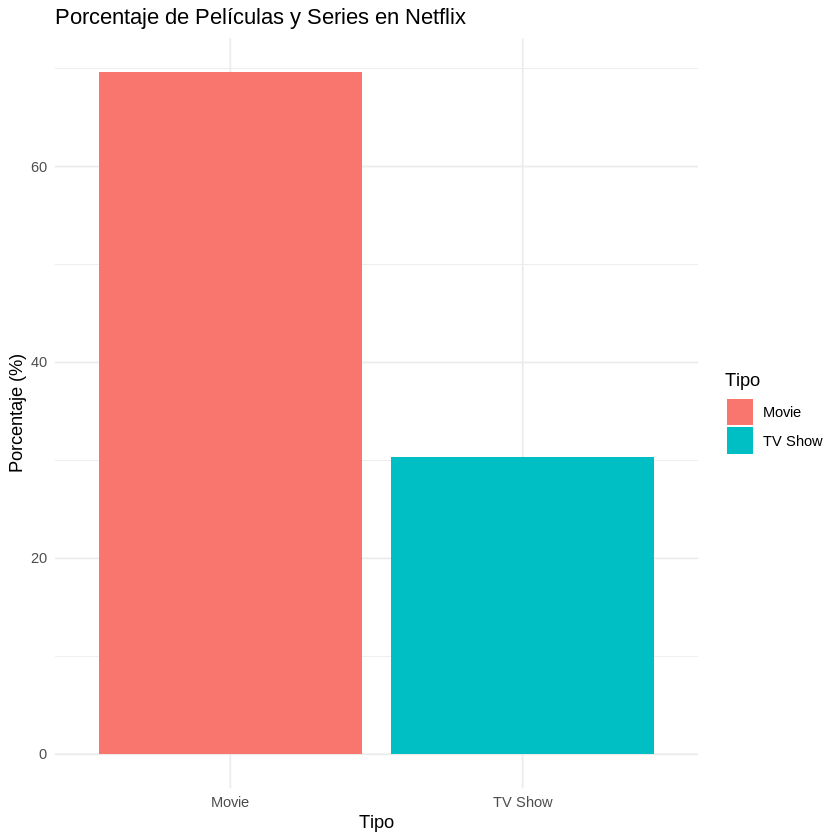

In [3]:
# En primer lugar, calcula la frecuencia y frecuencia relativa de las categorías del campo “Type”. ¿Qué porcentaje del catálogo de películas son “Movie” y qué porcentaje son “TV Show”? Complementa con un gráfico adecuado

#Creamos una tabla solo con los datos de la frecuencia (type) del catálogo Movie / Tv Show

frecuencia <- table(datos$type)
print(frecuencia)

frecuencia_acumulada <- prop.table(frecuencia) * 100
print(frecuencia_acumulada)
#Resp: Movie 6131(69,62%) vs TV Show 2676 (30,38%)

# Calcula la frecuencia y frecuencia relativa de las categorías del campo “type”
frecuencia <- table(datos$type)
frecuencia_acumulada <- prop.table(frecuencia) * 100

# Mostrar los resultados en consola
print(frecuencia)
print(frecuencia_acumulada)

# Gráfico de Movie vs TV Show
datos_grafico <- as.data.frame(frecuencia_acumulada)
colnames(datos_grafico) <- c("Tipo", "Porcentaje")
ggplot(datos_grafico, aes(x = Tipo, y = Porcentaje, fill = Tipo)) +
  geom_bar(stat = "identity") +
  labs(title = "Porcentaje de Películas y Series en Netflix",
       x = "Tipo",
       y = "Porcentaje (%)") +
  theme_minimal()



In [6]:
# Filtramos las películas
peliculas <- datos %>%
  filter(type == "Movie")

# Sacamos el dato con respecto a los minutos (lo hacemos númerico)
peliculas <- peliculas %>%
  mutate(duracion_min = as.numeric(str_extract(duration, "\\d+")))


estadisticas_descriptivas <- peliculas %>%
  summarise(
    media = mean(duracion_min, na.rm = TRUE),
    mediana = median(duracion_min, na.rm = TRUE),
    desviacion_std = sd(duracion_min, na.rm = TRUE),
    minimo = min(duracion_min, na.rm = TRUE),
    maximo = max(duracion_min, na.rm = TRUE)
  )

# Exponemos
print(estadisticas_descriptivas)


     media mediana desviacion_std minimo maximo
1 99.57719      98       28.29059      3    312
